In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

def ME_powder ( prop_solid, prop_fluid ,phi ) :
    '''
    Maxwell-Eucken model - Calculates effective powder bed properties as a function of porosity and respective properties
    Results questionable close to 50% porosity
    > prop_solid: Solid phase property
    > prop_fluid : Fluid phase property
    > phi : Porosity 
    Xue, Samuel S., and Joel W. Barlow. "Models for the Prediction of the Thermal."
    1991 International Solid Freeform Fabrication Symposium. 1991.
    '''
    if phi <= 0.5:
        apar = ( (3 * prop_solid) / ( (2 * prop_solid) + prop_fluid) )
        num = prop_solid * ( 1 - ( (1 - ((apar * prop_fluid) / prop_solid ) ) * phi) )
        den = 1 + ( ( apar - 1 ) * phi)
        ME_powder = num / den
        
    elif phi > 0.5 : 
        apar = (3 * prop_fluid ) / ( (2 * prop_fluid) + prop_solid )
        num = prop_fluid * (1 - (1 - (apar * prop_solid / prop_fluid)) * (1 - phi) )
        den = 1 + ( (apar - 1) * (1 - phi) )
        ME_powder = num / den
    return ME_powder

In [2]:
# Thermal conductivity of intrinsic Bi2Te3 at 300K (W/mK)
'''Goldsmid, H. J. "Heat conduction in bismuth telluride." 
Proceedings of the Physical Society 72.1 (1958): 17.'''
k_solid = 2.3

# Thermal conductivity of argon gas at 300K - 1 bar (W/mK)
'''Jaques, Al. Thermophysical properties of argon. No. FERMILAB-D0-EN-142. 
Fermi National Accelerator Laboratory, 1988.'''
k_Ar_RT = 0.01791
k_Ar_400 = 0.02283 

# Air thermal conductivity at W/mK at  RT and 1 atm
# k_air = 0.026

phi = 0.4

In [3]:
ME_powder ( 2.3, k_Ar_RT ,phi ), ME_powder ( 2.3, k_Ar_400 , phi)

(1.1611720010284328, 1.1642334294354333)

In [11]:
ME_powder (2.3, k_Ar_RT, 0.40)

1.1611720010284328

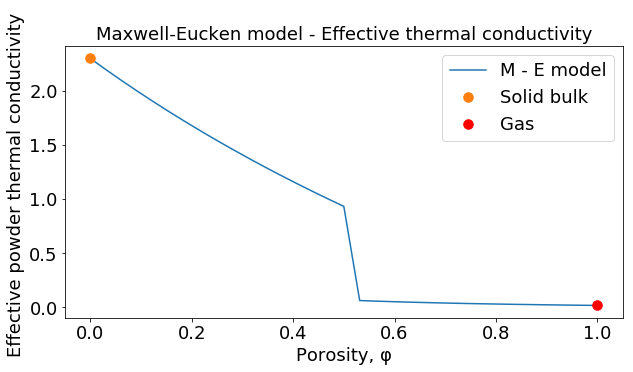

In [4]:
phiarray = numpy.linspace (0,1,33)  
size = numpy.size (phiarray, 0)
bed_array = numpy.zeros (size)
i = 0
for phivalue in phiarray: 
    bed_array [i] = ME_powder (k_solid , k_Ar_RT, phivalue )
    i = i + 1
pyplot.figure(figsize=(10,5))
pyplot.plot (phiarray,bed_array, label = 'M - E model')
pyplot.plot (0, k_solid, '.', label= 'Solid bulk', markersize = 19)
pyplot.plot (1, k_Ar_RT, '.', color = 'red',label= 'Gas', markersize = 19)
font=18 
pyplot.ylabel('Effective powder thermal conductivity ',fontsize=font)
pyplot.xlabel('Porosity, φ',fontsize=font)
pyplot.yticks(fontsize=font, rotation=0)
pyplot.xticks(fontsize=font,rotation=0);
pyplot.title ( 'Maxwell-Eucken model - Effective thermal conductivity', fontsize = font)
pyplot.legend(loc='best',fontsize=font);

## **!!! Close to 50% porosity, the transition to higher porosities leads to a sharp decrease in effective thermal conductivity **

In [5]:
# Load thermal conductivity of bulk Bi2Te3 values for various temperatures including the liquid phase
tempk_values=numpy.loadtxt(fname= "Bulk_ThermalCond_Bi2Te3.txt", delimiter=',', skiprows=0, unpack=False, usecols = (0,1))
ME_k_values = ME_powder ( tempk_values[:8,1] , k_Ar_RT, phi )
ME_k_values = numpy.round(ME_k_values,2)
print (ME_k_values)

[1.16 1.26 1.85 2.93 3.9  5.09 7.9  8.77]


In [6]:
tempk_values 

array([[ 298.15,    2.3 ],
       [ 400.  ,    2.49],
       [ 524.44,    3.68],
       [ 637.78,    5.84],
       [ 717.78,    7.78],
       [ 773.33,   10.16],
       [ 828.89,   15.78],
       [ 844.44,   17.51],
       [ 900.  ,   18.51],
       [1000.  ,   20.52],
       [1100.  ,   22.16],
       [1200.  ,   23.17],
       [1300.  ,   24.1 ]])

In [7]:
tempk_values[:8,1] = ME_k_values
#tempk_values = numpy.around(tempk_values,decimals = 1)
tempk_values

array([[2.9815e+02, 1.1600e+00],
       [4.0000e+02, 1.2600e+00],
       [5.2444e+02, 1.8500e+00],
       [6.3778e+02, 2.9300e+00],
       [7.1778e+02, 3.9000e+00],
       [7.7333e+02, 5.0900e+00],
       [8.2889e+02, 7.9000e+00],
       [8.4444e+02, 8.7700e+00],
       [9.0000e+02, 1.8510e+01],
       [1.0000e+03, 2.0520e+01],
       [1.1000e+03, 2.2160e+01],
       [1.2000e+03, 2.3170e+01],
       [1.3000e+03, 2.4100e+01]])

In [8]:
filename = "ME_EffThermalCond_Bi2Te3_Ar_"+str(phi)+".txt"
numpy.savetxt(filename,tempk_values, fmt = '%1.2f', delimiter=',')